<a href="https://colab.research.google.com/github/PedroEMPeres/bancodedados/blob/main/Avalia%C3%A7%C3%A3o_Bancos_de_Dados_I_PEDRO_ELIAS_MUNIZ_PERES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação Bancos de Dados I

BANCO DE DADOS I


Aluno: Pedro Elias Muniz Peres

ID: 1007023

Turma: 1007

## Questão 1

1 - ** Ainda sem fazer normalizações, apresente o modelo conceitual deste esboço oferecido pelo gestor, destacando atributos chaves e multivalorados, caso existam, e apresentando também a cardinalidade dos relacionamentos.**

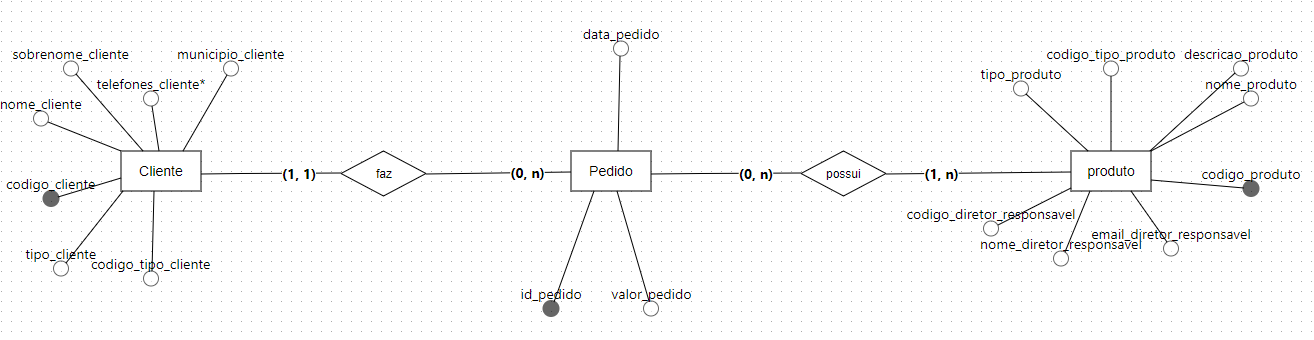

Além das tabelas de Cliente e de Produto, adicionei a tabela pedido, que registra as compras dos produtos financeiros e de fato é o elo entre ambas as tabelas do modelo proposto.

'*' O único item que acredito que possa ser multivalorado é o telefone do cliente.

Explicando Relacionamentos e Cardinalidade:

* Cliente pode fazer nenhum ou vários pedidos: (0,n)

* Pedido pode ser feito por apenas um cliente: (1,1)

* Pedido pode possuir 1 ou vários produtos: (1,n)

* Produto pode estar em nenhum ou vários pedidos: (0,n)



## Questão 2

Agora apresente um modelo lógico que expresse as mesmas informações e relacionamentos descritos no modelo original, mas decompondo-os quando necessário para que sejam respeitadas as 3 primeiras formas normais. Destaque atributos chaves e multivalorados, caso existam, e apresente também a cardinalidade dos relacionamentos.

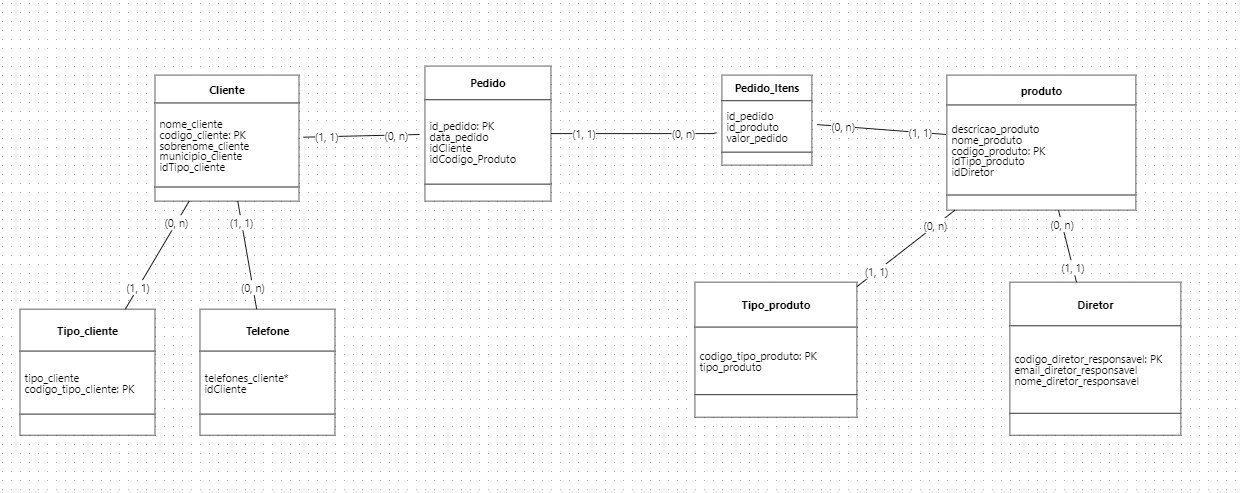

Explicando operações para manter as formas normais:

1 - O campo multivalorado do telefone passa a ser uma dimensão a parte.

2 - tipo cliente, tipo produto e diretor, são independentes das chaves primárias em cliente e produto, podem passar a ser dimensões a parte também.

3 - Pedido precisaria ser quebrada em pedido e pedido itens, para evitar que haja repedição dos pedidos quando há mais de 1 item.

-
-
-

Explicando relacionamentos e cardinalidade:

* Cliente tem apenas um tipo cliente: (1,1)

* Tipo cliente pode ser de nenhum cliente ou de vários: (0,n)

* Cliente pode ter nenhum ou vários Telefones: (0,n)

* Um telefone deve pertencer a apenas 1 cliente: (1,1)

* Um cliente pode fazer nenhum ou vários pedidos: (0,n)

* Um pedido é feito por apenas 1 cliente: (1,1)

* um pedido possui 1 ou vários itens: (1,n) (o BRmodelo mudou para 0,n porém minha resposta final é de que deveria ser (1,n)

* a combicação pedido_item e id_pedido é única e possui apenas 1 pedido: (1,1)

* a combicação pedido_item e id_pedido é única e possui apenas 1 produto: (1,1)

* o produto pode estar em nenhum pedido_itens ou em vários (0,n)

* O produto pode ter apenas um tipo: (1,1)

* O tipo produto pode ser de nenhum produto ou de vários: (0,n)

* O produto pode ter apenas 1 diretor: (1,1)

* O diretor pode ter nenhum ou vários produtos: (0,n)


Código emitido pelo BR modelo, com alterações no 'n' do varchar:

-
-
-
``` sql
CREATE TABLE Cliente
(
 nome_cliente VARCHAR(200),  
 codigo_cliente INT PRIMARY KEY AUTO_INCREMENT,  
 sobrenome_cliente VARCHAR(200),  
 municipio_cliente VARCHAR(200),  
 idTipo_cliente INT,  
);

CREATE TABLE produto
(
 descricao_produto VARCHAR(200),  
 nome_produto VARCHAR(200),  
 codigo_produto INT PRIMARY KEY AUTO_INCREMENT,  
 idTipo_produto INT,  
 idDiretor INT,  
);

CREATE TABLE Pedido
(
 id_pedido INT PRIMARY KEY AUTO_INCREMENT,  
 data_pedido DATE,  
 valor_pedido INT NOT NULL,  
 idCliente INT,  
 idCodigo_Produto INT,  
);

CREATE TABLE Tipo_cliente
(
 tipo_cliente VARCHAR(200),  
 codigo_tipo_cliente INT PRIMARY KEY AUTO_INCREMENT,  
);

CREATE TABLE Tipo_produto
(
 codigo_tipo_produto INT PRIMARY KEY,  
 tipo_produto VARCHAR(200),  
);

CREATE TABLE Diretor
(
 codigo_diretor_responsavel INT PRIMARY KEY AUTO_INCREMENT,  
 email_diretor_responsavel VARCHAR(200),  
 nome_diretor_responsavel VARCHAR(200),  
);

CREATE TABLE Telefone
(
 telefones_cliente* VARCHAR(200),  
 idCliente INT,  
);

CREATE TABLE Pedido_Itens
(
 id_pedido INT,  
 id_produto INT,  
);

ALTER TABLE Cliente ADD FOREIGN KEY(idTipo_cliente) REFERENCES Tipo_cliente (idTipo_cliente)

ALTER TABLE produto ADD FOREIGN KEY(idTipo_produto) REFERENCES Tipo_produto (idTipo_produto)

ALTER TABLE produto ADD FOREIGN KEY(idDiretor) REFERENCES Diretor (idDiretor)

ALTER TABLE Pedido ADD FOREIGN KEY(idCliente) REFERENCES Cliente (idCliente)

ALTER TABLE Pedido ADD FOREIGN KEY(idCodigo_Produto) REFERENCES Cliente (idCodigo_Produto)

ALTER TABLE Telefone ADD FOREIGN KEY(idCliente) REFERENCES Cliente (idCliente)

ALTER TABLE Pedido_Itens ADD FOREIGN KEY(id_pedido) REFERENCES Cliente (id_pedido)

ALTER TABLE Pedido_Itens ADD FOREIGN KEY(id_produto) REFERENCES Cliente (id_produto)
```



## Questão 3
Liste os nomes de todos os produtos que custam mais de 100 reais, ordenando-os primeiramente pelo preço e em segundo lugar pelo nome. Use alias para mostrar o nome da coluna nome como "Produto" e da coluna preco como "Valor". A resposta da consulta não deve mostrar outras colunas de dados.

-- criando select hipotético:

``` sql
Select
produto_nome as Produto,
preco as Valor
from produto
where preco > 100
order by preco, nome;
```

## Questão 4
Liste todos os ids e preços de produtos cujo preço seja maior do que a média de todos os preços encontrados na tabela "produtos".

``` sql
select
id_produto,
preco
from produto
where
id_categoria = (select avg(id_categoria) as media from produto)
```

---

Dei preferência por atuar com sub-queries, assim eu consigo passar uma querry que calcula a media como condição de exibição da querry original.


## Questão 5
Para cada categoria, mostre o preço médio do conjunto de produtos a ela associados. Caso uma categoria não tenha nenhum produto a ela associada, esta categoria não deve aparecer no resultado final. A consulta deve estar ordenada pelos nomes das categorias.

``` sql
select
a.id_categoria,
a.categoria,
b.media_valor
from categoria a
inner join
(select
id_categoria,
avg(preco) as media_valor
from produto group by id_categoria) b
on b.id_categoria = a.id_categoria
where b.media_valor > 0
order by a.categoria
;
```
-

---


Mais uma vez optei por uma subquerry.

A tabela 'b' é uma subquerry que irá fazer o cálculo das médias dos valores.

O inner join garante que só trarei valores em comum entre as tabelas 'a' e 'b'.

E a cláusula where garante que só mostrarei valores > 0 , assim as categorias sem produtos não irão aparecer.

O Order by é para  a ordenação requisitada.

## Questão 6
Com o objetivo de demonstrar o seu conhecimento através de um exemplo contextualizado com o dia-a-dia da escola, utilize os comandos do subgrupo de funções DDL para construir o banco de dados simples abaixo, que representa um relacionamento do tipo 1,n entre as entidades "aluno" e "turma":


``` sql
CREATE TABLE Turma (
                    id_turma int auto_increment primary key,
                    codigo_turma varchar(200) not null,
                    nome_turma varchar(200)
);



CREATE TABLE Aluno (
                id_aluno int auto_increment primary key,
                nome_aluno varchar(200) not null,
                aluno_alocado boolean,
                id_turma int,
                foreign key (id_turma) references Turma (id_turma)
);

```
--

---



## Questão 7
 Agora que você demonstrou que consegue ser mais do que um simples usuário do banco de dados, mostre separadamente cada um dos códigos DML necessários para cumprir cada uma das etapas a seguir:


### 7.a

a) Inserir pelo menos duas turmas diferentes na tabela de turma;


``` sql
insert into Turma (codigo_turma, nome_turma)
values
 ('Calc_I_202302','Cálculo I - 2023-02'),
 ('EDO_2023_02','Equações Diferenciais Ordinárias - 2023-02');
```

### 7.b

b) Inserir pelo menos 1 aluno alocado em cada uma destas turmas na tabela aluno (todos com NULL na coluna aluno_alocado);

``` sql
insert into Aluno (nome_aluno, aluno_alocado, id_turma)
values
 ('Maria Vitória',null, 1),
 ('Pedro Elias', null, 2);
```

### 7.c
c) Inserir pelo menos 2 alunos não alocados em nenhuma turma na tabela aluno (todos com NULL na coluna aluno_alocado);


``` sql
insert into Aluno (nome_aluno, aluno_alocado, id_turma)
values
 ('Sebastião Peres',null, null),
 ('Luciene da Silva', null, null);
```

### 7.d
d) Atualizar a coluna aluno_alocado da tabela aluno, de modo que os alunos associados a uma disciplina recebam o valor True e alunos não associdos a nenhuma disciplina recebam o falor False para esta coluna.

``` sql
update Aluno
set Aluno_alocado = True
where id_turma is not null
```